# Clustering Using K-Means Algorithm

# Practice Session

##  K-Means Clustering

##Task 1

### Importing required Python Libraries

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
#reading data file 
df1=pd.read_csv('/content/DS2_C6_S2_Cities_Data_Practice.csv')
df2=pd.read_csv('/content/DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv')
df3=pd.read_csv('/content/DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv')
df4=pd.read_csv('/content/DS2_C6_S2_WorldCities_Data_Practice.csv')


In [3]:
df4.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [4]:
df1.head()

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


In [5]:
#renaming city col as City in worldcities dataset

df4.rename(columns = {'city':'City'}, inplace = True)

#renaming country col as Country in worldcities dataset

df4.rename(columns = {'country':'Country'}, inplace = True)

In [6]:
#sort df based on Population in desc
sorted_df4 = df4.sort_values(by=['population'], ascending=False)
sorted_df4.head()

,City,city_ascii,lat,lng,Country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [7]:
df4.columns

Index(['City', 'city_ascii', 'lat', 'lng', 'Country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')

In [8]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['City', 'Country'], dtype='object')
Index(['City', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg Rent',
       'Avg Disposable Income'],
      dtype='object')
Index(['City', 'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
       'Quality of Life', 'Crime Rating'],
      dtype='object')
Index(['City', 'city_ascii', 'lat', 'lng', 'Country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')


In [9]:
#merging dataframes
# merge function can at a time takes only 2 data frames

df = pd.merge(df1,df2,on=['City'])
df = pd.merge(df,df3,on=['City'])
df = pd.merge(df,df4,on=['City','Country'],how='left')
df.columns

Index(['City', 'Country', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline',
       'Avg Rent', 'Avg Disposable Income', 'Movehub Rating', 'Purchase Power',
       'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating',
       'city_ascii', 'lat', 'lng', 'iso2', 'iso3', 'admin_name', 'capital',
       'population', 'id'],
      dtype='object')

In [10]:
df.head()

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,Crime Rating,city_ascii,lat,lng,iso2,iso3,admin_name,capital,population,id
0,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,...,55.07,Orlando,28.4772,-81.3369,US,USA,Florida,NaN,1822394.0,1.840015e+09
1,Oslo,Norway,3.36,11.20,12.32,1.57,2016.66,2800.92,82.09,52.51,...,35.53,Oslo,59.9111,10.7528,NO,NOR,Oslo,primary,693494.0,1.578325e+09
2,Ottawa,Canada,2.39,7.65,9.56,0.80,1020.02,2900.68,87.69,91.85,...,22.25,Ottawa,45.4247,-75.6950,CA,CAN,Ontario,NaN,989567.0,1.124399e+09
3,Oxford,United Kingdom,2.49,7.97,7.97,1.36,1494.67,1693.96,80.94,50.33,...,24.22,Oxford,51.7519,-1.2578,GB,GBR,Oxfordshire,NaN,154600.0,1.826690e+09
4,Quito,Ecuador,1.22,2.94,6.54,0.29,310.54,196.13,67.15,14.24,...,48.36,Quito,-0.2186,-78.5097,EC,ECU,Pichincha,primary,2011388.0,1.218442e+09


In [11]:
(df.isna().sum())

City                      0
Country                   0
Cappuccino                0
Cinema                    0
Wine                      0
Gasoline                  0
Avg Rent                  0
Avg Disposable Income     0
Movehub Rating            0
Purchase Power            0
Health Care               0
Pollution                 0
Quality of Life           0
Crime Rating              0
city_ascii               13
lat                      13
lng                      13
iso2                     13
iso3                     13
admin_name               14
capital                  84
population               13
id                       13
dtype: int64

In [12]:
data_df=df

In [13]:
#converting non int type to category
data_df['City']=data_df['City'].astype('category')
data_df['Country']=data_df['Country'].astype('category')
data_df['city_ascii']=data_df['city_ascii'].astype('category')
data_df['iso2']=data_df['iso2'].astype('category')
data_df['iso3']=data_df['iso3'].astype('category')
data_df['admin_name']=data_df['admin_name'].astype('category')
data_df['capital']=data_df['capital'].astype('category')

In [14]:
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data_df['City_encode']= label_encoder.fit_transform(data_df['City'])
data_df['City_encode'].unique()

data_df['Country_encode']= label_encoder.fit_transform(data_df['Country'])
data_df['Country_encode'].unique()

data_df['city_ascii_encode']= label_encoder.fit_transform(data_df['city_ascii'])
data_df['city_ascii_encode'].unique()

data_df['iso2_encode']= label_encoder.fit_transform(data_df['iso2'])
data_df['iso2_encode'].unique()

data_df['iso3_encode']= label_encoder.fit_transform(data_df['iso3'])
data_df['iso3_encode'].unique()

data_df['admin_name_encode']= label_encoder.fit_transform(data_df['admin_name'])
data_df['admin_name_encode'].unique()

data_df['capital_encode']= label_encoder.fit_transform(data_df['capital'])
data_df['capital_encode'].unique()

array([3, 2, 0, 1])

In [15]:
data_df.dtypes

City                     category
Country                  category
Cappuccino                float64
Cinema                    float64
Wine                      float64
Gasoline                  float64
Avg Rent                  float64
Avg Disposable Income     float64
Movehub Rating            float64
Purchase Power            float64
Health Care               float64
Pollution                 float64
Quality of Life           float64
Crime Rating              float64
city_ascii               category
lat                       float64
lng                       float64
iso2                     category
iso3                     category
admin_name               category
capital                  category
population                float64
id                        float64
City_encode                 int64
Country_encode              int64
city_ascii_encode           int64
iso2_encode                 int64
iso3_encode                 int64
admin_name_encode           int64
capital_encode

In [16]:

#imputation based method to fill in missing values of each column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = data_df.select_dtypes(include=numerics)
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5)
#df_filled=imputer.fit_transform(new_df).toseries()
df_filled = pd.DataFrame(imputer.fit_transform(new_df),columns=new_df.columns)
df_filled.columns

Index(['Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg Rent',
       'Avg Disposable Income', 'Movehub Rating', 'Purchase Power',
       'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating', 'lat',
       'lng', 'population', 'id', 'City_encode', 'Country_encode',
       'city_ascii_encode', 'iso2_encode', 'iso3_encode', 'admin_name_encode',
       'capital_encode'],
      dtype='object')

In [17]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_data_df = df_filled.select_dtypes(include=numerics)
 new_data_df1 = new_data_df.drop(['lat', 'lng'], axis=1)
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_data_df1.to_numpy()),columns=new_data_df1.columns)
 return df_scaled

In [18]:
# scaling the data using MinMax Scaling process
scale = 'MinMax' 
data_df_scaled=feature_scale(scale)
data_df_scaled
data_df1=data_df_scaled
data_df1.head(10)

,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,...,Crime Rating,population,id,City_encode,Country_encode,city_ascii_encode,iso2_encode,iso3_encode,admin_name_encode,capital_encode
0,-0.084698,-0.180700,0.108051,-0.989261,0.123436,0.617140,0.680717,1.148558,0.649070,0.936628,...,0.850346,-0.282835,1.142889,0.837450,1.135845,0.704467,1.129833,1.152270,-0.793394,0.988242
1,1.792998,0.774603,1.559777,1.577460,1.400798,1.489470,0.322198,0.250232,1.484365,-0.685569,...,-0.377506,-0.467533,0.223991,0.855831,0.053483,0.722860,0.274367,0.266135,0.505153,0.171544
2,0.492023,0.137136,0.725035,-0.594381,-0.114979,1.600003,1.195114,2.154335,-0.036037,-0.522408,...,-1.211994,-0.419093,-1.369919,0.874211,-1.338126,0.741253,-1.232883,-1.224184,0.466390,0.988242
3,0.626144,0.194598,0.244150,0.985140,0.606910,0.262972,0.142938,0.144717,-0.023693,-1.388024,...,-1.088203,-0.555701,1.096098,0.892592,1.097189,0.759645,-0.662572,-0.660279,0.524534,0.988242
4,-1.077195,-0.708630,-0.188343,-2.032873,-1.194017,-1.396605,-2.006619,-1.602082,-2.340985,-1.259378,...,0.428704,-0.251914,-1.039699,1.039637,-0.990224,0.888394,-0.906991,-0.901953,0.602059,0.171544
5,-0.433413,-0.011906,-0.980744,0.646671,0.148834,-0.197109,0.833477,0.325738,0.477622,0.349092,...,-0.138094,-0.046627,0.737681,0.377935,0.749287,0.281434,-0.825518,-0.821395,-0.056905,0.171544
6,0.773677,-0.302806,3.764587,-2.371341,-0.025703,-0.310057,-0.383930,-0.342683,0.389154,-1.169168,...,-1.366575,-0.555231,-1.634713,0.396316,-1.608717,0.299827,-1.395829,-1.385299,-1.723697,0.171544
7,0.505435,0.199985,-0.351663,0.392819,0.158751,-0.075418,0.291022,0.724564,-0.351502,-1.838285,...,-1.089460,-0.138433,1.094541,0.414696,1.097189,0.318220,-0.662572,-0.660279,-0.018142,0.988242
8,-0.594359,-0.739156,-0.729716,-0.425147,-0.462258,-1.368307,-1.825801,-1.574977,0.961105,0.719734,...,1.559785,3.196408,0.330363,0.433077,0.208106,0.336612,0.437313,0.467529,0.001239,0.171544
9,-0.433413,0.278995,-0.877913,0.872317,-0.110477,-0.244331,0.248935,0.469973,0.753310,-0.834610,...,0.360210,-0.438652,-0.926168,0.451458,-0.835601,0.355005,-0.703309,-0.700558,0.640822,-1.461852


In [19]:
#Data frame after adding lat,lng columns
col=df_filled[['lat','lng']]
type(col)
frames=[data_df1,col]
#data_df=pd.merge(data_df,col) merge can be performed on common cols
data_df2=pd.concat(frames,axis=1)

In [20]:
data_df2.head(-10)

,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,...,id,City_encode,Country_encode,city_ascii_encode,iso2_encode,iso3_encode,admin_name_encode,capital_encode,lat,lng
0,-0.084698,-0.180700,0.108051,-0.989261,0.123436,0.617140,0.680717,1.148558,0.649070,0.936628,...,1.142889,0.837450,1.135845,0.704467,1.129833,1.152270,-0.793394,0.988242,28.4772,-81.3369
1,1.792998,0.774603,1.559777,1.577460,1.400798,1.489470,0.322198,0.250232,1.484365,-0.685569,...,0.223991,0.855831,0.053483,0.722860,0.274367,0.266135,0.505153,0.171544,59.9111,10.7528
2,0.492023,0.137136,0.725035,-0.594381,-0.114979,1.600003,1.195114,2.154335,-0.036037,-0.522408,...,-1.369919,0.874211,-1.338126,0.741253,-1.232883,-1.224184,0.466390,0.988242,45.4247,-75.6950
3,0.626144,0.194598,0.244150,0.985140,0.606910,0.262972,0.142938,0.144717,-0.023693,-1.388024,...,1.096098,0.892592,1.097189,0.759645,-0.662572,-0.660279,0.524534,0.988242,51.7519,-1.2578
4,-1.077195,-0.708630,-0.188343,-2.032873,-1.194017,-1.396605,-2.006619,-1.602082,-2.340985,-1.259378,...,-1.039699,1.039637,-0.990224,0.888394,-0.906991,-0.901953,0.602059,0.171544,-0.2186,-78.5097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,-0.996722,-0.157356,-0.947475,0.505642,-0.888395,-0.669378,0.437547,-0.128265,0.621638,-0.732634,...,0.738756,-1.515266,0.749287,-1.539447,-0.825518,-0.821395,1.164117,-0.645154,38.3453,-0.4831
205,0.706616,-0.062185,1.701926,-0.509764,-0.965306,-1.124251,-0.876504,-1.264242,0.605179,0.578929,...,-0.400342,-1.496885,-0.371731,-1.521054,-0.214471,-0.217212,-1.723697,0.171544,31.9500,35.9333
206,0.089659,0.293360,-0.877913,1.238991,0.635031,0.322394,0.619925,-0.007746,0.103865,0.256922,...,0.048529,-1.478505,-0.062485,-1.502662,0.233630,0.225856,0.330721,0.171544,52.3500,4.9166
207,-0.285880,-0.651168,-0.521031,1.718488,-1.335596,-1.212358,-1.264640,-1.182444,-0.479745,-0.640072,...,0.977760,-1.460124,0.981222,-1.484269,1.007623,0.991155,-1.665553,-1.461852,36.9081,30.6956


In [21]:
(data_df2.isna().sum())

Cappuccino               0
Cinema                   0
Wine                     0
Gasoline                 0
Avg Rent                 0
Avg Disposable Income    0
Movehub Rating           0
Purchase Power           0
Health Care              0
Pollution                0
Quality of Life          0
Crime Rating             0
population               0
id                       0
City_encode              0
Country_encode           0
city_ascii_encode        0
iso2_encode              0
iso3_encode              0
admin_name_encode        0
capital_encode           0
lat                      0
lng                      0
dtype: int64

In [ ]:
#np.where(np.isnan(data_df2)) 
#np.isnan(data_df).sum()

### TAsk 2

In [ ]:
# findng optimal value of K

Method 1: ELBOW METHOD

In [22]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_df2)
    # calculates squared error
    # for the clustered points
    Sum_of_squared_distances.append(km.inertia_)

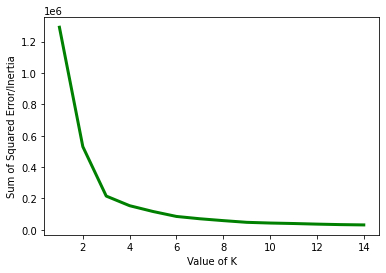

In [23]:
     
# plot the cost against K values
plt.plot(K, Sum_of_squared_distances, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sum of Squared Error/Inertia")
plt.show() 
 

### From the graph, its clear that, the elbow is at k=3 (i.e. Sum of squared distances falls suddenly) indicating the optimal k for this dataset is 3.

##Method 2:  using Silhoutte score

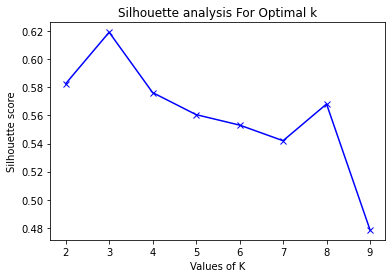

In [24]:
#range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
range_n_clusters =range(2,10) 
#Silhouette Coefficient is only defined 
#if number of labels is 2 <= n_labels <= n_samples - 1. 
#So, start the range from 2 to n
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data_df2)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(data_df2, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

### TAsk3

We see that the silhouette score is maximized at k = 3. So, we will take 3 clusters.

### Modelling with K=3

In [25]:
Kmeans_model_3 = KMeans(n_clusters=3)
Kmeans_model_3.fit(data_df2)

KMeans(n_clusters=3)

In [26]:
cluster_centroid_3 = Kmeans_model_3.cluster_centers_
cluster_centroid_3

array([[-5.97031289e-02,  6.41822922e-02, -2.58537551e-01,
         3.84614121e-01, -8.61777042e-02, -1.02710220e-01,
        -5.44744064e-02, -1.30214654e-01, -5.20969949e-02,
        -9.86666743e-02, -3.46342419e-03, -1.80115549e-01,
        -1.99038004e-01, -7.81867050e-02,  8.13392767e-02,
        -9.72749352e-02,  1.29443195e-01, -2.07064375e-01,
        -2.06592671e-01, -3.10044479e-02, -1.69984405e-01,
         4.04894124e+01,  1.52619855e+01],
       [ 3.10473070e-01,  1.03712434e-02,  1.93173239e-01,
        -4.36183550e-01,  9.78163318e-02,  3.74313843e-01,
         2.39220875e-01,  4.95345550e-01,  3.71241486e-02,
         1.50722603e-01,  2.61227377e-01,  3.34428535e-01,
        -1.71214218e-01,  4.51191756e-01, -1.38586099e-01,
         4.51245250e-01, -2.09572060e-01,  4.91627814e-01,
         5.08391845e-01, -1.25245445e-02,  4.67449007e-01,
         2.97197507e+01, -8.57649278e+01],
       [-3.71382440e-01, -1.94391699e-01,  3.77754428e-01,
        -3.05272208e-01,  6.8

In [27]:
labels_3= Kmeans_model_3.labels_
labels_3

array([1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 2,
       1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1],
      dtype=int32)

Text(0, 0.5, 'clusters')

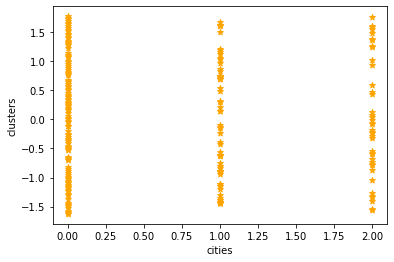

In [ ]:
X=data_df2['City_encode']
y=labels_3

plt.scatter(y,X,marker='*',c='orange')

plt.xlabel('cities')
plt.ylabel('clusters')



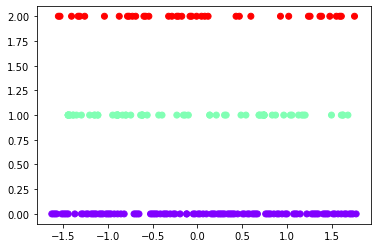

In [ ]:
plt.scatter(X,y, c=Kmeans_model_3.labels_, cmap='rainbow')

In [28]:
#Adding the cluster label back to the merged dataframe
data_df['cluster'] = labels_3

In [29]:
#grouping the cities based on the cluster label
for clu in data_df.cluster.unique():
    print(clu)
    #print(cities_all[cities_all.cluster == cluster].country.value_counts())
    print(data_df[data_df.cluster == clu].City.unique())

1
['Orlando', 'Ottawa', 'Quito', 'Mexico City', 'Montevideo', ..., 'Dallas', 'Detroit', 'Athens', 'Atlanta', 'Austin']
Length: 46
Categories (186, object): ['Aachen', 'Aberdeen', 'Abu Dhabi', 'Addis Ababa', ..., 'Vilnius',
                           'Warsaw', 'Wellington', 'Zagreb']
0
['Oslo', 'Oxford', 'Madrid', 'Manama', 'Manchester', ..., 'Alicante', 'Amman', 'Amsterdam', 'Antalya', 'Athens']
Length: 109
Categories (186, object): ['Aachen', 'Aberdeen', 'Abu Dhabi', 'Addis Ababa', ..., 'Vilnius',
                           'Warsaw', 'Wellington', 'Zagreb']
2
['Manila', 'Melbourne', 'Mumbai', 'Shanghai', 'Singapore', ..., 'Delhi', 'Dhaka', 'Adelaide', 'Ahmedabad', 'Auckland']
Length: 40
Categories (186, object): ['Aachen', 'Aberdeen', 'Abu Dhabi', 'Addis Ababa', ..., 'Vilnius',
                           'Warsaw', 'Wellington', 'Zagreb']


### Visualizing dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 32.0 MB/s 
     |████████████████████████████████| 16.7 MB 55.1 MB/s 
     |████████████████████████████████| 6.3 MB 58.2 MB/s 


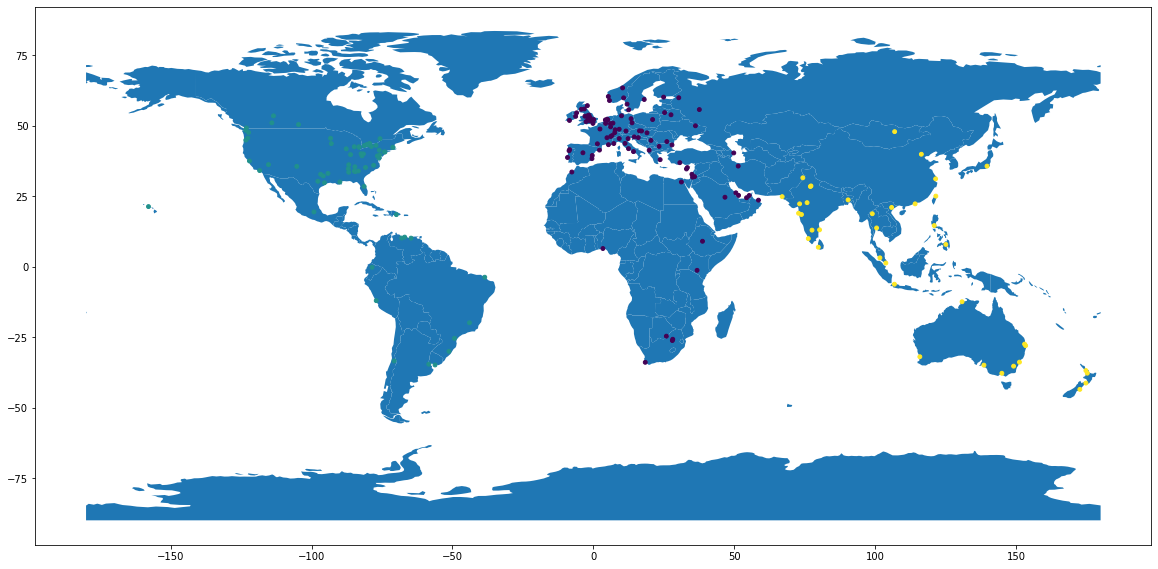

In [31]:
#visualizing the grouoed cities in the world map
!pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#plot clustered data onto map

geometry = [Point(xy) for xy in zip(data_df['lng'], data_df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(figsize=(20, 10)), marker='o', c=data_df.cluster.astype(float), markersize=15);



### Modelling with K=2

In [32]:
Kmeans_model_2 = KMeans(n_clusters=2)
Kmeans_model_2.fit(data_df2)

KMeans(n_clusters=2)

Text(0, 0.5, 'clusters')

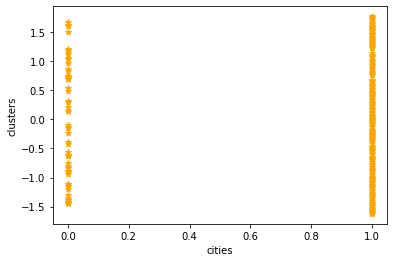

In [33]:
X=data_df2['City_encode']
y=Kmeans_model_2.labels_

plt.scatter(y,X,marker='*',c='orange')

plt.xlabel('cities')
plt.ylabel('clusters')

### Modelling with K=4

In [34]:
Kmeans_model_4 = KMeans(n_clusters=4)
Kmeans_model_4.fit(data_df2)

KMeans(n_clusters=4)

Text(0, 0.5, 'clusters')

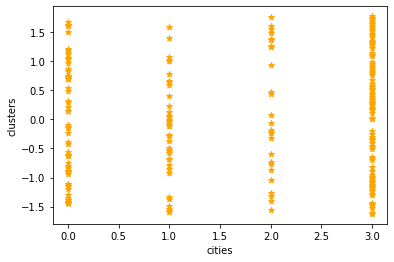

In [35]:
X=data_df2['City_encode']
y=Kmeans_model_4.labels_

plt.scatter(y,X,marker='*',c='orange')

plt.xlabel('cities')
plt.ylabel('clusters')